In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

#### 1. Read large conceptual geomodel files exported from Petrel and combine them together

In [2]:
# directory path of conceptual geomodel realizations. These conceptual models are simulated with object-based method in Petrel platform.
# The conceptual geomodels are exported from Petrel directly as model properties (with Gslib format).
# each file contain a number of conceptual geomodels. 
# In geomodels:  3-background mud faceis, 0-lobe facies, 4-channel facies.
dirpath = '/scratch/users/suihong/SubwaterFan/LargeConceptualModelsfromPetrel/' 


In [3]:
rlz_no = 400
con_x_size = 400
con_y_size = 400
con_z_size = 50
rlz_each_file = 400  # the number of realizations contained in each file

concpts = np.zeros((rlz_no, con_x_size, con_y_size, con_z_size), np.int8)  # shape [realizations, length, width, height]

filenames = []
for file in os.listdir(dirpath):
    if file.startswith("concpts_all_from_Petrel"):
        filenames.append(file)
filenames = sorted(filenames)

print(filenames)

file_no = 0
for filename in filenames:
    concpts_file = np.zeros((con_x_size * con_y_size * con_z_size, rlz_each_file), np.int8)
    i = -1
    with open (os.path.join(dirpath, filename)) as fl:
        for line in fl:
            eles = line.strip().split(' ')       
            if len(eles)>=5:            
                i = i + 1                
                concpts_file[i] = np.array(eles, dtype=np.float32).astype(np.int8)[3:]
                
    # concpt_no = len(allele[0])-3 # number of conceptual models 
    concpts_file = concpts_file.reshape(con_z_size, con_x_size, con_y_size, rlz_each_file)[::-1,::-1].transpose(3, 1, 2, 0)
    concpts_file = np.where(concpts_file == 0, 5, concpts_file)-3 # exchange code of levee and channels
    concpts[file_no * rlz_each_file: (file_no + 1) * rlz_each_file] = concpts_file
    file_no = file_no + 1

['concpts_all_from_Petrel']


NameError: name 'allele' is not defined

In [5]:
print(type(concpts[0, 0, 0, 0]))
print(concpts.shape)

<class 'numpy.int8'>
(400, 400, 400, 50)


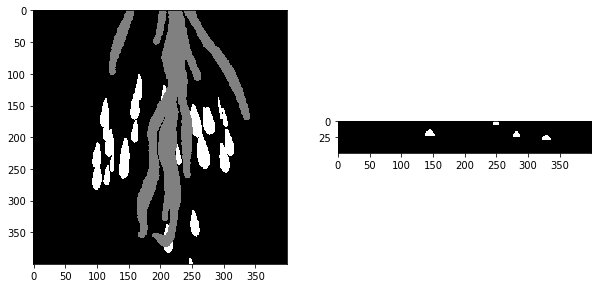

In [6]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5, forward=True)
ax[0].imshow(concpts[0, :, :, 0], cmap='gray')
ax[1].imshow(concpts[0,-1,:,:].transpose(1,0), cmap='gray')

#### 2. Save conceptual models into one int8 txt

In [7]:
concpts_int8_save = concpts.reshape(rlz_no, -1).transpose(1,0)  # shape of [-1, 400]

concpts_all_int8_fname = dirpath + '/concpts_all_int8.txt'
np.save(concpts_all_int8_fname, concpts_int8_save)   # , fmt='%i '*400  , newline='\n'

#### 3. Test the save int8 txt

In [8]:
concpts_all_int8_load = np.load(dirpath + 'concpts_all_int8.txt.npy')
print(concpts_all_int8_load.shape)

concpts_all_int8_load_4D = concpts_all_int8_load.transpose(1,0).reshape(rlz_no, con_x_size, con_y_size, con_z_size)
print(concpts_all_int8_load_4D.shape)

(8000000, 400)
(400, 400, 400, 50)


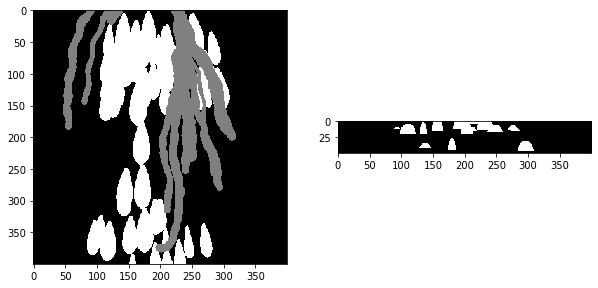

In [9]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5, forward=True)
ax[0].imshow(concpts_all_int8_load_4D[1, :, :, 0], cmap='gray')
ax[1].imshow(concpts_all_int8_load_4D[1,-1,:,:].transpose(1,0), cmap='gray')